In [1]:
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [4]:
X = sym.Symbol("x")

In [5]:
Y=+0.1*X**8-0.2*X**7+0.3*X**6-X**5+X**4-15*X+9*X**3-X**2-10

In [6]:
Y

0.1*x**8 - 0.2*x**7 + 0.3*x**6 - x**5 + x**4 + 9*x**3 - x**2 - 15*x - 10

In [7]:
# Actual Minima

dY = sym.diff(Y)

d2Y = sym.diff(Y)
polyRoots = sym.solveset(Y, X)
dRoots = sym.solveset(dY, X)

d2Roots = sym.solveset(d2Y, X)

dRoots = sym.solveset(sym.diff(Y), X)

dRoots = [root for root in dRoots if root.is_real]

minima = np.array([root for root in dRoots if sym.diff(sym.diff(Y)).evalf(subs={"x": root}) > 0 ])

minima

array([-1.11591693222185, 0.773510942505233], dtype=object)

-0.0200000000000000 10.2000000000000
-0.0498984656117013 -14.9492328058506
-0.123915381868282 -14.8335054693994
-0.301689734900029 -14.3464314398607
-0.666618503709096 -12.0961612740981
-0.949757965847410 -4.24739878300578
-0.875384691712773 0.783076076316756
-0.879659115954654 -0.0488290951663491


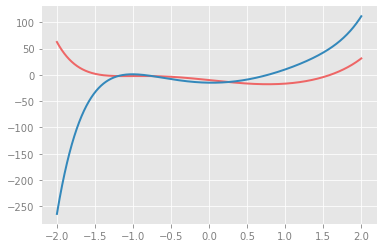

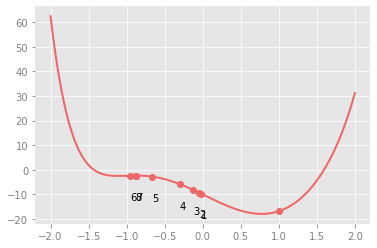

In [11]:
temp = np.array([(root, Y.evalf(subs={"x":root})) for root in minima])

globalminima = [t[0] for t in temp if t[1] is min(temp[:,1])]


x = np.linspace(-2, 2, 1000)

# Plot of the function
plt.plot(x, eval(str(Y)))

# Plot of its gradient
plt.plot(x, eval(str(sym.diff(Y))))


def gradientDescentSym(Y,point=0, mingrad=0.1, learning_rate=0.1, trace=False, max_iterations=1000):

  if trace:
    tracegrad = []
    tracepoint = [point]
  grad = mingrad

  iteration=0
  while np.abs(grad) >= mingrad and iteration < max_iterations :
    iteration+=1
    grad = sym.diff(Y).evalf(subs={"x":point})
    point -= learning_rate*grad*point
    print(point, grad)
    if trace:
      tracegrad.append(grad)
      tracepoint.append(point)
    
  if trace:
    return tracegrad, tracepoint
  return point


grads, points = gradientDescentSym(Y, point=1, trace=True)


fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]-10))


Minima point: -0.879659115954654 after 8 iterations. Precision (Global): 1.65317005845989. Precision (Local): 0.236257816267192


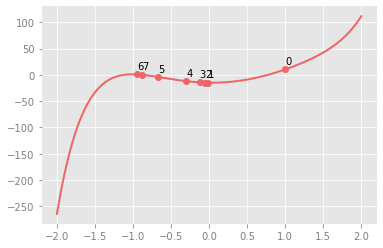

In [12]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")


In [13]:
grads, points = gradientDescentSym(Y, point=1, learning_rate=0.001, trace=True)

0.989800000000000 10.2000000000000
0.980208511259567 9.69033010753010
0.971175513186634 9.21538424648548
0.962656445435422 8.77191366085731
0.954611462365171 8.35706560569731
0.947004809056514 7.96832387682691
0.939804295954462 7.60345991191547
0.932980854099880 7.26049230031627
0.926508156643536 6.93765303746603
0.920362295210222 6.63335923083361
0.914521501911932 6.34618924383023
0.908965909555957 6.07486247656339
0.903677343971582 5.81822214538180
0.898639143473449 5.57522054939480
0.893836001354623 5.34490641066537
0.889253828006263 5.12641395224087
0.884879629830377 4.91895343952993
0.880701402575500 4.72180295943462
0.876708037104156 4.53430125087291
0.872889235912391 4.35584143197658
0.869235438978890 4.18586549492927
0.865737757734480 4.02385946035390
0.862387916120471 3.86934910032683
0.859178197852867 3.72189615323438
0.856101399134169 3.58109496538338
0.853150786159587 3.44656950399365
0.850320056853286 3.31797069430515
0.847603306345677 3.19497404031895
0.844994995766884 3.

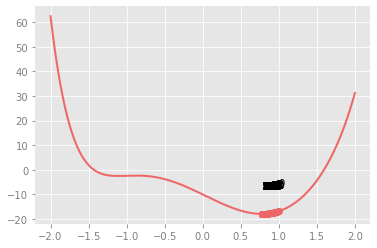

In [14]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

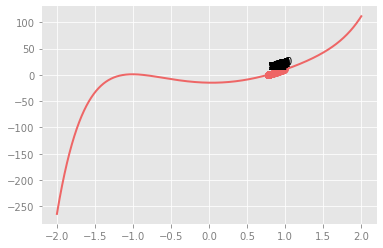

In [15]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [16]:
print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")

Minima point: 0.775872626993083 after 134 iterations. Precision (Global): 0.00236168448785057. Precision (Local): 0.00236168448785057


In [17]:
grads, points = gradientDescentSym(Y, point=1, learning_rate=1, trace=True, max_iterations=500)

-9.20000000000000 10.2000000000000
-50295951.0947348 -5466950.20594944
-3.27607776797630e+61 -6.51360138673121e+53
-1.06150882089888e+492 -3.24018199834920e+430
-1.28967073866245e+3936 -1.21494114158219e+3444
-6.12238670062153e+31488 -4.74724789597940e+27552
-1.57926875215900e+251910 -2.57949853445009e+220421
-3.09555358436117e+2015281 -1.96011830166923e+1763371
-6.74522740414946e+16122251 -2.17900521516621e+14106970
-3.42817318191466e+128978014 -5.08236857930950e+112855762
-1.52613169645628e+1031824116 -4.45173454044678e+902846101
-2.35410638881403e+8254592929 -1.54253161393629e+7222768813
-7.54568505884009e+66036743434 -3.20532882230590e+57782150505
-8.40774215694117e+528293947478 -1.11424504089144e+462257204044
-1.99767605289684e+4226351579831 -2.37599585668504e+3698057632352
-2.02903947052794e+33810812638650 -1.01569995174424e+29584461058819
-2.29833827681854e+270486501109202 -1.13272231033560e+236675688470552
-6.22875984070462e+2163892008873618 -2.71011447859048e+1893405507764416


-1.26023800305097e+30586129955006039360805361322768133109975402857739812215745939595767693727572868776864864 -1.19064487989379e+26762863710630284440704691157422116471228477500522335688777697146296732011626260179756756
-5.08991537238373e+244689039640048314886442890582145064879803222861918497725967516766141549820582950214918912 -4.03885247077245e+214102909685042275525637529259376931769827820004178685510221577170373856093010081438054048
-3.60391450460965e+1957512317120386519091543124657160519038425782895347981807740134129132398564663601719351301 -7.08049985302968e+1712823277480338204205100234075015454158622560033429484081772617362990848744080651504432388
-2.27659524561597e+15660098536963092152732344997257284152307406263162783854461921073033059188517308813754810412 -6.31700680663774e+13702586219842705633640801872600123633268980480267435872654180938903926789952645212035459110
-5.77266803266132e+125280788295704737221858759978058273218459250105302270835695368584264473508138470510038483298 -2.

-3.74895799747749e+85261686341966824587578024114683836008763871828696877849054546650535374483975866698607158804442199264661471010249486424374011829579 -1.30334083164096e+74603975549220971514130771100348356507668387850109768117922728319218452673478883361281263953886924356578787133968300621327260350882
-3.12158082740553e+682093490735734596700624192917470688070110974629575022792436373204282995871806933588857270435537594117291768081995891394992094636636 -8.32652921026565e+596831804393767772113046168802786852061347102800878144943381826553747621387831066890250111631095394852630297071746404970618082807056
-7.21251391661280e+5456747925885876773604993543339765504560887797036600182339490985634263966974455468710858163484300752938334144655967131159936757093091 -2.31053248831215e+4774654435150142176904369350422294816490776822407025159547054612429980971102648535122000893048763158821042376573971239764944662456455
-5.85845772145901e+436539834070870141888399483467181240364871023762928014587159278850741

-5.32014636905043e+27668999134173510147318977857307258842155854947556656541632899609896246116588510276143443248766139107646275198235749359225328302511196273162534599727130865828241550 -7.46568018432990e+24210374242401821378904105625143851486886373079112074473928787158659215352014946491625512842670371719190490798456280689322162264697296739017217774761239507599711356
-5.13426917704154e+221351993073388081178551822858458070737246839580453252333063196879169968932708082209147545990129112861170201585885994873802626420089570185300276797817046926625932405 -9.65061639452212e+193682993939214571031232845001150811895090984632896595791430297269273722816119571933004102741362973753523926387650245514577298117578373912137742198089916060797690854
-3.86294974595246e+1770815944587104649428414582867664565897974716643626018664505575033359751461664657673180367921032902889361612687087958990421011360716561482402214382536375413007459245 -7.52385512474896e+154946395151371656824986276000920649516072787706317276633

-4.99387202128385e+274020495001167263709064141270953471239392751958756502604137061663292580085120538729137959383361042206311081450446396693952480411469816341744426938948586755400655937333279042201468818495824877 -9.41930762506801e+239767933126021355745431123612084287334468657963911939778619928955381007574480471387995714460440911930522196269140597107208420360036089299026373571580013410975573945166619161926285216183846767
-3.09449121717728e+2192163960009338109672513130167627769915142015670052020833096493306340640680964309833103675066888337650488651603571173551619843291758530733955415511588694043205247498666232337611750547966599021 -6.19657693266583e+1918143465008170845963448988896674298675749263711295518228959431643048060595843771103965715683527295444177570153124776857667362880288714392210988572640107287804591561332953295410281729470774143
-6.72673040455128e+17537311680074704877380105041341022159321136125360416166664771946450725125447714478664829400535106701203909212828569388412958746334

-7.78389628877240e+21710140310191638507068758826470977647959955798154354428230293083225189763770162562467634489277391712248572505738779227511450482386428439889472741504599399838667335018482856129469410313836496207212103185278617934281968207 -7.81058672772734e+18996372771417683693685163973162105441964961323385060124701506447822041043298892242159180178117717748217500942521431824072519172088124884903288648816524474858833918141172499113285734024606934181310590287118790692496722181
-1.07811804149667e+173681122481533108056550070611767821183679646385234835425842344665801518110161300499741075914219133697988580045910233820091603859091427519115781932036795198709338680147862849035755282510691969657696825482228943474255745663 -1.38506218672487e+151970982171341469549481311785296843535719690587080480997612051582576328346391137937273441424941741985740007540171454592580153376704999079226309190532195798870671345129379992906285872196855473450484722296950325539973777455
-1.46022741064735e+138944897985226

-9.14839174745539e+102523238939246196291868777947660392366709130477607856032759668432390329721979794501692443102256567966818504789667472849022076876887762193267465703791862867541973144079119492763437943238791419292730008916610044135096471376627799335368337384393 -5.05897936118614e+89707834071840421755385180704202843320870489167906874028664709878341538506732320188980887714474496970966191690959038742894317267276791919109032490817880009099226501069229556168008200333942491881138757802033788618209412454549324418447295211344
-3.92507549716266e+820185911513969570334950223581283138933673043820862848262077347459122637775838356013539544818052543734548038317339782792176615015102097546139725630334902940335785152632955942107503545910331354341840071332880353080771771013022394682946699075151 -4.29045410987610e+7176626725747233740430814456336227465669639133432549922293176790267323080538585615118471017157959757677295335276723099431545381382143353528722599265430400727938120085538364493440656026715399350

-4.03213792881920e+60519038410241539468855079107216196677124918079225244979932422833631407606312744231899413029550875705773603678175695067865558910001261330961985542080318546809880665586607153228884970831708279547591227821369716408954697942653185014333542930123766511923907826184825 -2.47018628257312e+52954158608961347035248194218814172092484303319322089357440869979427481655523651202911986400857016242551903218403733184382364046251103664591737349320278728458645582388281259075274349477744744604142324343698501857835360699821536887541850063858295697933419347911722
-5.58950083141122e+484152307281932315750840632857729573416999344633801959839459382669051260850501953855195304236407005646188829425405560542924471280010090647695884336642548374479045324692857225831079766653666236380729822570957731271637583541225480114668343440990132095391262609478604 -1.38623750726903e+42363326887169077628198555375051337673987442655457671485952695983541985324418920962329589120685612994041522574722986547505891237000

-2.29810617315207e+8721712602661905017173835577323753208075698959938958188457213386330679465006212472340385424267074199546939024542853933326542499618948006834231966610189030619288009784615336273738041731400840118291461539329825183723851250082644198076024576920460871947991594751683888696647367229747 -8.49346842384313e+7631498527329166890027106130158284057066236589946588414900061713039344531880435913297837246233689924603571646474997191660724687166579505979952970783915401791877008561538419239520786514975735103505028846913597035758369843822313673316521504805403262954492645407723402609566446326028
-6.22372939896049e+69773700821295240137390684618590025664605591679511665507657707090645435720049699778723083394136593596375512196342831466612339996951584054673855732881512244954304078276922690189904333851206720946331692314638601469790810000661153584608196615363686975583932758013471109573178937837978 -2.70819924321602e+61051988218633335120216849041266272456529892719572707319200493704314756255043487

-4.43410523735602e+157116406509522857099557358645749687968743649969298376808664184660515594672162037848727397239670622206440688330233134161927715525461170302599449185588717517590902619839558837016188233061288429014164590905108639447477943488578528489518070988288780772895171122944247250581001892931900962362370799131 -1.50952911929738e+137476855695832499962112688815030976972650693723136079707581161577951145338141783117636472584711794430635602288953992391686751084778524014774518037390127827892039792359613982389164703928627375387394017041970059516543200552506212428328312114752683176283274732576216344258376656315413342067074449240
-1.19546800471470e+1256931252076182856796458869165997503749949199754387014469313477284124757377296302789819177917364977651525506641865073295421724203689362420795593484709740140727220958716470696129505864490307432113316727240869115579823547908628227916144567906310246183161368983553978004648015143455207698898966393053 -2.69607494798102e+10998148455666599996969015105

-9.47644992539719e+691005263486404796218450197974669065449429654349627322838115863104941405813686061233150327156312060097161335748690083103805344253795514129972283432670593274506477014355584995381578427984138000628791745227428501252068635611935671695651219144403673521457523926393996464725319812153966784980284910894846740085265 -5.21736489181897e+604629605550604196691143923227835432268250947555923907483351380216823730086975303579006536261773052585016168780103822715829676222071074863725748003586769115193167387561136870958881124486120750550192777073999938595560056160443712733694816751353214331275333435594746906634654835634720936857749297032990897574607
-5.20301842346843e+5528042107891238369747601583797352523595437234797018582704926904839531246509488489865202617250496480777290685989520664830442754030364113039778267461364746196051816114844679963052627423873104005030333961819428010016549084895485373565209753155229388171660191411151971717802558497231734279842279287158773920682127 -5.490472132

-8.07768006953745e+194500690446776502870067647093534167697207060547779526746291669191526734493518784247066400272420764259955148028398769390902714480726720974666914249425735912975425163547964871154872509336843971425172716371743178427985418145012426813513062917586477331049429042266094044888096192354199185533212275314238478326066679755171367464 -6.05009320908973e+170188104140929440011309191206842396735056177979307085903005210542585892681828936216183100238368168727460754524848923217039875170635880852833549968247518923853497018104469262260513445669738474997026126825275281124487240876885873461823930052888167664668250411982832289277084168309924287341560740899958668535308344785774946531
-1.45005065067521e+15560055235742120229605411767482733415776564843822362139703333535322138759481502739765312021793661140796411842271901551272217158458137677973353139954058873038034013083837189692389800746947517714013817309739454274238833451600994145081045033406918186483954323381287523591047695388335934842656982

-4.83640028073111e+855423083026764501450947257932184272197717970527237030700728328657774678998362421558098097265144497405780995285823072031306750579043214233099920583188400667609244804233175499742239926938828293248896335839355627375913023588058479285895266406220045710031527010309607068113642624884132608138222637363612044856587482996496701580611341377250 -2.17191690865280e+748495197648418938769578850690661238173003224211332401863137287575552844123567118863335835107001435230058370875095188027393406756662812453962430510289850584158089203704028562274459936071474756592784293859436173953923895639551169375158358105442539996277586134020906184599437296773616032120944807693160539249514047621934613883034923705094
-2.39479249603501e+68433846642141160116075780634574741775817437642178962456058266292621974319868993724647847781211559792462479622865845762504540046323457138647993646655072053408739584338654039979379194155106263459911706867148450190073041887044678342871621312497603656802522160824768565449

-1.34608792465358e+3762190505823688935859776533544558627773194986747878322278170762205062986173301389462934212314749600841918685277122833220315936646164140136331140715511222552500503492033956996732289961971401637953031526936847492396143344078016250540455529775024688439511559821537707204770344432956360029471590067244627346524905727624099241841251552155630826450802656 -1.26132062744968e+3291916692595727818877304466851488799301545613404393531993399416929430112901638715780067435775405900736678849617482479067776444565393622619289748126072319733437940555529712372140753716724976433208902586069741555846625426068264219222898588553146602384572614843845493804174051378836815025787641308839048928209292511671086836611095108136176973144452324
-8.62337780611695e+300975240465895114868782122683564690221855598939830265782253660976405038893864111157034736985179968067353494822169826657625274931693131210906491257240897804200040279362716559738583196957712131036242522154947799391691467526241300043236442382001

-4.07493814275485e+2068286103530808514764132077240592161925185251009701221321227729711889711518006995980116665099695359237772136852039586003983271767409011933888413542335326820347815106792914153271752224493600476453005157408089988759173675435923848784358249641738915128357302226873862256039962179866013557988105663991566756484061356752459523221320990747862105837523092603499976597 -7.88391877702902e+1809750340589457450418615567585518141684537094633488568656074263497903497578256121482602081962233439333050619745534637753485362796482885442152361849543410967804338218443799884112783196431900416896379512732078740164276966006433367686313468436521550737312639448514629474034966907382761863239592455992620911923553687158402082818655866904379342607832706028062479522
-6.08216435330192e+165462888282464681181130566179247372954014820080776097705698218376951176921440559678409333207975628739021770948163166880318661741392720954711073083386826145627825208543433132261740177959488038116240412592647199100733894

-2.57670845803083e+142131538774977483189604486809166228146281712829251483588894896154894301013259433005340872685884418359827245050872742604551799647553629198587591204442459842541848531659685019725403315277044227322490803711793258040730536895702583585204288616945157712749028084275379371310406656505622366295224214141378304622397431560147238716789219602886181223837637958028990313975061772473 -1.66943060516550e+124365096428105297790903925958020449627996498725595048140283034135532513386602003879673263600148866064848839419513649778982824691609425548764142303887152362224117465202224392259727900867413698907179453247819100785639219783739760637053752539827012998655399573740956949896605824442419570508321187373706016544597752615128833877190567152525408570857933213275366524728179050914
-1.55457704735921e+11370523101998198655168358944733298251702537026340118687111591692391544081060754640427269814870753468786179604069819408364143971804290335887007296355396787403347882532774801578032265222163538185799

-3.82871558595495e+1220900621537368386871482076040464685831909321208997508347568575533174346377457854242884083035946515382879955406552571488751680448374327628088787228995229875021097909727935522763444279049764271791375294405814905596453383831127918882317698177449047603638475755496572515542474508304707406728241361449041077434245195330461294466629408639516511133423821287245468036847324144706068188385 -2.36079195385341e+1068288043845197338512546816535406600102920656057872819804122503591527553080275622462523572656453200960019960980733500052657720392327536674577688825370826140643460671011943582418013744168543737817453382605088042396896710852236929022027985905267916653183666286059500951099665194766618980887211191267910942754964545914153632658300732559576947241745843626339784532241408626617809664837
-3.69415264417312e+976720497229894709497185660832371748665527456967198006678054860426539477101966283394307266428757212306303964325242057191001344358699462102471029783196183900016878327782348418210

-2.31398436803904e+10487456482338140927034582543287961996581930175660406958596588066064579161514715111183043954716677351949260653530163357297780998781620707057261184265673950506435565664590886655731313445674071007706424448670693543532189314286459196784190772708284928327948847954293342388694759424164797429493534014036293196281373408778926344655998146917086537140150409872135814284945160293247468803723973580441 -1.51950319137872e+9176524422045873311155259725376966747009188903702856088772014557806506766325375722285163460377092682955603071838892937635558373933918118675103536232464706693131119956517025823764899264964812131743121392586856850590665650000651797186166926119749312286955241960006674590107914496144197750806842262281756546746201732681560551573998378552450719997631608638118837499327015256591535203258476882886
-6.57617487034981e+83899651858705127416276660346303695972655441405283255668772704528516633292117720889464351637733418815594085228241306858382247990252965656458089474125391604051

-5.02358377566236e+90086565219731033790105308568868602171620507778033966178446343601862509845417606450576355310477268344811912716583277138263064646274553565374666371502598785648526784121356726812017604424590415306561713952270918886218210856282015651653055477214106230836488529449132816699949023706751194148279188867498968470191615209339055888580672822490979801237670757843637728048338177225951296293549419078327251425729 -2.99414750208621e+78825744567264654566342144997760026900167944305779720406140550651629696114740405644254310896667609801710423627010367495980181565490234369702833075064773937442460936106187135960515403871516613393241499708237054025440934499246763695196423542562342951981927463267991214612455395743407294879744290259061597411417663308171673902508088719679607326082961913113183012042295905072707384256855741693536344997513
-3.24488403168736e+7206925217578482703208424685509488173729640622242717294275707488149000787633408516046108424838181467584953017326662171061045171701964285229

-4.41952886707919e+773837702855431688089546457398558420096689320459139023827194291721556648949093270335648172818751587384766432777863384338688665800966031600568780105029296326739473376762558473614443901559761463873480751261421003096351921494726826753620003226216518902625089914926316686573287403375250146551611381726630693786416276355054877633940419260549543002624752456307919047278708756667425640139201541402428014518156758657437 -8.46428399469978e+677107989998502727078353150223738617584603155401746645848795005256362067830456611543692151216407638961670628680630461296352582575845277650497682591900634285897039204667238664412638413864791280889295657353743377709307931307885973409417502822939454039796953675560527100751626477953343878232659959010801857063114241810673017929697866852980850127296658399269429166368870162083997435121801348727124512703387163825257
-1.16438817537394e+61907016228434535047163716591884673607735145636731121906175543337724531915927461626851853825500126990781314622229070747

-8.13883874995799e+830901906543961229076668688499866412965177447311116452913791059595492336361927091236323961304673550841414499344876417122636601785255687732836361387429068211309742116364468750365428867606454719224421327088328488696586559931652789340163940867003609625435142433416988104642837926176364848814594515154312710520612078996764695930763990084147197546004738489984545303469382976748853768227433876969054574337424119158764873647073 -4.56697239996677e+727039168225966075442085102437383111344530266397226896299567177146055794316686204831783466141589356986237686926766864982307026562098726766231816214000434684896024351818910156569750259155647879321368661202287427609513239940196190672643448258628158422255749629239864591562483185404319242712770200760023621705535569122169108939418491323628797852754146178736477140535710104655247047199004642347922752545246104263919264441189
-1.54024405130883e+66472152523516898326133495079989313037214195784889316233103284767639386908954167298905916904373884067

-1.16213421252988e+892174128697590466294064073433534386013566880759502075628064127084956643423277119099104905266185598205017139266614409175844656490062098452630139369661258371832139928994804924808376258846009204393438021092322440564236235434898181360795386325564597213798686630156955360065503663388987338455666952522187371260786003298418214707503904426470125377535451818879011405957848805608863835005798097896144250204609365167125541016938658124941 -2.63018017093052e+780652362610391658007306064254342587761871020664564316174556111199337062995367479211716792107912398429389996858287608028864074428804336146051371948453601075353122437870454309207329226490258053844258268455782135493706706005535908690695963034869022562073850801387335940057315705465363921148708583456913949853187752886115937869065916373161359705343520341519134980213117704907755855630073335659126218929033194521234848389821325859323
-2.66158463616079e+71373930295807237303525125874682750881085350460760166050245130166796531473862169527

-6.95087298952415e+31390586512125510670208168053355090883540660757879136715298030269404582683286804166047764897721920052893654354080451068335023004067191700383159531738047769028405236504399456714356450087783958388611447337734005382433164643623272661274566335004553656473010823203033666506041283805379732645684614815340785450592552316282915722849775413690358376182041957520745016274124309910345576768037214624505413297170338052899846332367324108265443309505667523 -2.23702419929308e+27466763198109821836432147046685704523098078163144244625885776485729009847875953645291794285506680046281947559820394684793145128558792737835264590270791797899854581941349524625061893826810963590035016420517254709629019063170363578615245543128984449413884470302654458192786123329707266064974037963423187269268483276747551257493553486979063579159286712830651889239858771171552379672032562796442236635024045796287365540821408594732262895817459083
-4.35918007837059e+2511246920970040853616653444268407270683252860630330937

-1.05273672822725e+4213173202244930492995097603163503075622340082541295828528684465634711000538898427547865744050388485297026113021985671607099530433633229365884401811424662714461318306923157084635267712927763449765969536462306870769950470317045344520785877669598061425900006009720861425950559386561261892951218005070179768913988625612630353536374541335779996756922985939106908951635990065734467008655537966349489696447191602452161186279475103251013821914651498171606204 -3.21674068128994e+3686526551964314181370710402768065191169547572223633849962598907430372125471536124104382526044089924634897848894237462656212089129429075695148851584996579875153653518557762449055859248811793018545223344404518511923706661527414676455687642960898303747662505258505753747706739463241104156332315754436407297799740047411051559344327723668807497162307612696718545332681491307517658632573595720555803484391292652145641037994540715344637094175320060900155428


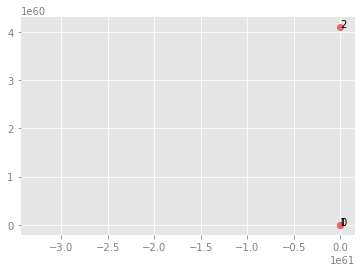

In [18]:

fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

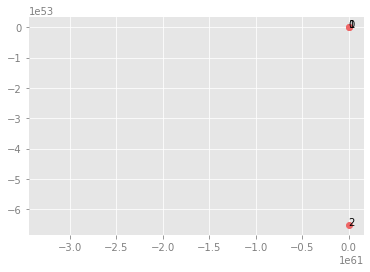

In [19]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [20]:
print(f"Minima point: {repr(points[-1])} after {len(grads)} iterations. Precision (Global): {repr(np.abs(points[-1] - globalminima[0]))}. Precision (Local): {repr(min([np.abs(points[-1] - root) for root in minima]))}")

Minima point: -1.05273672822725e+4213173202244930492995097603163503075622340082541295828528684465634711000538898427547865744050388485297026113021985671607099530433633229365884401811424662714461318306923157084635267712927763449765969536462306870769950470317045344520785877669598061425900006009720861425950559386561261892951218005070179768913988625612630353536374541335779996756922985939106908951635990065734467008655537966349489696447191602452161186279475103251013821914651498171606204 after 500 iterations. Precision (Global): 1.05273672822725e+4213173202244930492995097603163503075622340082541295828528684465634711000538898427547865744050388485297026113021985671607099530433633229365884401811424662714461318306923157084635267712927763449765969536462306870769950470317045344520785877669598061425900006009720861425950559386561261892951218005070179768913988625612630353536374541335779996756922985939106908951635990065734467008655537966349489696447191602452161186279475103251013821914651498171606204. Pr

In [21]:
grads, points = gradientDescentSym(Y, point=1,learning_rate=0.05,mingrad=1, trace=True)

0.490000000000000 10.2000000000000
0.717312237805626 -9.27805052267861
0.794790702323636 -2.16024376650897
0.760716680455545 0.857433831786729


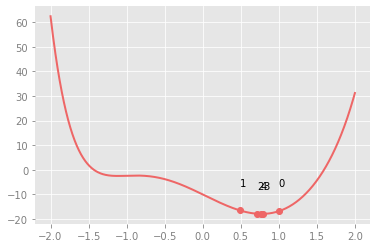

In [22]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]+10))

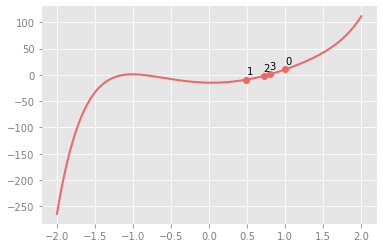

In [23]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(sym.diff(Y))))
gradsY= [Y.evalf(subs={"x":grad}) for grad in grads]
ax.scatter(points[:-1], grads)

for i, txt in enumerate(grads):
    ax.annotate(i, (points[:-1][i], grads[i]+10))

In [24]:
print(f"Minima point: {points[-1]} after {len(grads)} iterations. Precision (Global): {np.abs(points[-1] - globalminima[0])}. Precision (Local): {min([np.abs(points[-1] - root) for root in minima])}")

Minima point: 0.760716680455545 after 4 iterations. Precision (Global): 0.0127942620496879. Precision (Local): 0.0127942620496879
